# <b><span style='color:#F1A424'>AutoML - Multiclass Classification - BMI Value Prediction </span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    

**Dataset used: BMI Dataset**

**Features**:

- `gender`: Gender of person.
- `height`: Height of person.
- `weight`: Weight of person.

**Target Variable**:

- `bmi`: BMI value of person.

        
**Objective**:

The primary objective is typically to build a model that can accurately predict BMI of person.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','bmi')

In [5]:
# Fetching in teradata dataframe
bmi_df = DataFrame("bmi")

In [6]:
# first 5 rows
bmi_df.head()

gender,height,weight,bmi
Female,184,76,2
Female,197,114,3
Female,181,111,4
Female,158,153,5
Female,190,50,0
Female,164,71,3
Female,141,143,5
Female,185,110,4
Female,176,54,1
Female,190,105,3


In [7]:
# bmi_df dataset
bmi_df.shape

(500, 4)

In [8]:
# Removing less count category rows i.e, 0 and 1
bmi_df = bmi_df[(bmi_df.bmi != 0) & (bmi_df.bmi != 1)]

In [9]:
# bmi_df dataset
bmi_df.shape

(465, 4)

In [10]:
# Performing sampling to get 80% for trainning and 20% for testing
bmi_df_sample = bmi_df.sample(frac = [0.8, 0.2])

In [11]:
bmi_df_sample.head()

gender,height,weight,bmi,sampleid
Female,186,148,4,1
Female,164,70,3,1
Female,188,90,3,2
Female,178,154,5,1
Female,166,153,5,1
Female,182,84,3,2
Female,147,67,4,1
Female,157,110,5,1
Female,197,154,4,2
Female,146,157,5,2


In [12]:
# Fetching train and test data
bmi_df_train= bmi_df_sample[bmi_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
bmi_df_test = bmi_df_sample[bmi_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [13]:
# train data shape
bmi_df_train.shape

(372, 4)

In [14]:
# test data shape
bmi_df_test.shape

(93, 4)

In [15]:
#train dataset
bmi_df_train.head()

gender,height,weight,bmi
Female,151,64,3
Female,185,81,2
Female,175,120,4
Female,149,108,5
Female,188,122,4
Female,168,135,5
Female,182,126,4
Female,163,159,5
Female,172,67,2
Female,157,110,5


In [16]:
# test dataset
bmi_df_test.head()

gender,height,weight,bmi
Female,185,100,3
Female,190,105,3
Female,194,111,3
Female,150,70,4
Female,177,96,4
Female,176,156,5
Female,146,157,5
Female,197,154,4
Female,164,82,4
Female,189,132,4


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [17]:
# Creating AutoML instance
# Using knn model for model training.
# Keeping early stopping criteria max_models with value 3
# and verbose level 2 for detailed loggging

aml = AutoML(task_type="Classification",
             include='knn',
             max_models=3,
             verbose=2)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 372
Total Columns in the data: 4

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
height,INTEGER,372,0,None,0,372,0,0.0,100.0
weight,INTEGER,372,0,None,0,372,0,0.0,100.0
bmi,INTEGER,372,0,None,0,372,0,0.0,100.0
gender,VARCHAR(20) CHARACTER SET LATIN,372,0,0,None,None,None,0.0,100.0



Statistics of Data:


func,height,weight,bmi
min,140,50,2
std,15.878,30.35,1.08
25%,155,84,3
50%,169,109.5,4
75%,182,138.25,5
max,199,160,5
mean,168.559,109.925,3.997
count,372,372,372



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
gender                    2         

No Futile columns found.

Target Column Distribution:


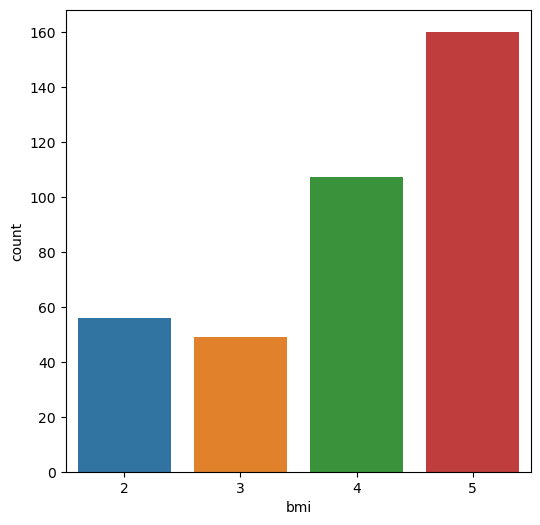

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
No outlier found!


gender,height,weight,bmi
Female,160,83,4
Female,181,94,3
Female,187,102,3
Female,188,122,4
Female,189,124,4
Female,175,141,5
Male,170,95,4
Male,174,90,3
Male,173,139,5
Male,159,154,5


Remaining Rows in the data: 368                                                         
Remaining Columns in the data: 4


Analysis indicates all categorical columns are significant. No action Needed.           


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719261583032186"' - 5/15


['gender']


gender_0,gender_1,height,weight,bmi,id
1,0,187,102,3,55
1,0,189,124,4,79
1,0,175,141,5,87
1,0,143,118,5,95
1,0,182,126,4,111
1,0,185,119,4,119
0,1,173,139,5,28
0,1,168,158,5,44
0,1,155,57,2,52
0,1,142,135,5,60


Training size : 0.8                                                                      
Testing size  : 0.2                                                                      


gender_0,gender_1,height,weight,bmi,id
1,0,166,153,5,39
1,0,187,102,3,55
1,0,188,122,4,63
1,0,164,142,5,71
1,0,175,141,5,87
1,0,143,118,5,95
0,1,170,95,4,12
0,1,174,90,3,20
0,1,159,154,5,36
0,1,168,158,5,44


gender_0,gender_1,height,weight,bmi,id
0,1,157,56,2,188
0,1,142,69,4,212
0,1,154,105,5,244
0,1,163,137,5,372
0,1,141,86,5,484
0,1,192,101,3,540
1,0,160,83,4,31
1,0,141,126,5,127
1,0,198,145,4,191
1,0,150,87,4,207


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
No outlier found!


['weight', 'gender_1', 'gender_0', 'height']


['weight', 'height']


id,gender_0,gender_1,bmi,weight,height
2,1,0,5,0.4,0.11864406779661017
4,1,0,5,0.9363636363636364,0.4406779661016949
5,0,1,5,0.9454545454545454,0.3220338983050847
6,1,0,3,0.4,0.6949152542372882
8,1,0,3,0.4727272727272727,0.7966101694915254
9,0,1,2,0.06363636363636363,0.2542372881355932
7,0,1,5,0.9818181818181818,0.4745762711864407
3,0,1,3,0.36363636363636365,0.576271186440678
1,0,1,4,0.4090909090909091,0.5084745762711864
0,1,0,5,0.9818181818181818,0.1864406779661017


id,gender_0,gender_1,bmi,weight,height
127,1,0,5,0.6909090909090909,0.01694915254237288
191,1,0,4,0.8636363636363636,0.9830508474576272
188,0,1,2,0.05454545454545454,0.288135593220339
207,1,0,4,0.33636363636363636,0.1694915254237288
215,1,0,5,0.42727272727272725,0.1694915254237288
212,0,1,4,0.17272727272727273,0.03389830508474576
204,0,1,5,0.8272727272727273,0.2033898305084746
124,0,1,5,0.4909090909090909,0.3220338983050847
28,0,1,5,0.8090909090909091,0.559322033898305
31,1,0,4,0.3,0.3389830508474576


['height', 'weight']


['r_height', 'r_weight']


id,bmi,r_height,r_weight
2,5,0.11864406779661017,0.4
4,5,0.4406779661016949,0.9363636363636364
5,5,0.3220338983050847,0.9454545454545454
6,3,0.6949152542372882,0.4
8,3,0.7966101694915254,0.4727272727272727
9,2,0.2542372881355932,0.06363636363636363
7,5,0.4745762711864407,0.9818181818181818
3,3,0.576271186440678,0.36363636363636365
1,4,0.5084745762711864,0.4090909090909091
0,5,0.1864406779661017,0.9818181818181818


id,bmi,r_height,r_weight
127,5,0.01694915254237288,0.6909090909090909
191,4,0.9830508474576272,0.8636363636363636
188,2,0.288135593220339,0.05454545454545454
207,4,0.1694915254237288,0.33636363636363636
215,5,0.1694915254237288,0.42727272727272725
212,4,0.03389830508474576,0.17272727272727273
204,5,0.2033898305084746,0.8272727272727273
124,5,0.3220338983050847,0.4909090909090909
28,5,0.559322033898305,0.8090909090909091
31,4,0.3389830508474576,0.3


['height', 'weight']


id,gender_0,gender_1,bmi,height,weight
39,1,0,5,0.4406779661016949,0.9363636363636364
55,1,0,3,0.7966101694915254,0.4727272727272727
63,1,0,4,0.8135593220338984,0.6545454545454545
71,1,0,5,0.4067796610169492,0.8363636363636363
87,1,0,5,0.5932203389830508,0.8272727272727273
95,1,0,5,0.05084745762711865,0.6181818181818182
12,0,1,4,0.5084745762711864,0.4090909090909091
20,0,1,3,0.576271186440678,0.36363636363636365
36,0,1,5,0.3220338983050847,0.9454545454545454
44,0,1,5,0.4745762711864407,0.9818181818181818


id,gender_0,gender_1,bmi,height,weight
188,0,1,2,0.288135593220339,0.05454545454545454
212,0,1,4,0.03389830508474576,0.17272727272727273
244,0,1,5,0.23728813559322035,0.5
372,0,1,5,0.3898305084745763,0.7909090909090909
484,0,1,5,0.01694915254237288,0.32727272727272727
540,0,1,3,0.8813559322033898,0.4636363636363636
31,1,0,4,0.3389830508474576,0.3
127,1,0,5,0.01694915254237288,0.6909090909090909
191,1,0,4,0.9830508474576272,0.8636363636363636
207,1,0,4,0.1694915254237288,0.33636363636363636


['col_0', 'col_1', 'col_2']


response_column : bmi                                                                                                                                 
name : knn
model_type : Classification
k : (3, 5, 6, 8, 10, 12)
id_column : id
voting_weight : 1.0
Total number of models for knn : 6
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719264946657267"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719260092858261"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265305174627"'


,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,KNN_3,rfe,0.891892,0.891892,0.891892,0.891892,0.891379,0.886391,0.886185,0.899953,0.891892,0.892790
1,2,KNN_1,lasso,0.824324,0.824324,0.824324,0.824324,0.807751,0.789854,0.796909,0.827446,0.824324,0.824241
2,3,KNN_0,lasso,0.797297,0.797297,0.797297,0.797297,0.774444,0.759314,0.763394,0.803724,0.797297,0.797375


In [18]:
# Fitting train data
aml.fit(bmi_df_train, bmi_df_train.bmi)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [19]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,KNN_3,rfe,0.891892,0.891892,0.891892,0.891892,0.891379,0.886391,0.886185,0.899953,0.891892,0.892790
1,2,KNN_1,lasso,0.824324,0.824324,0.824324,0.824324,0.807751,0.789854,0.796909,0.827446,0.824324,0.824241
2,3,KNN_0,lasso,0.797297,0.797297,0.797297,0.797297,0.774444,0.759314,0.763394,0.803724,0.797297,0.797375


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [20]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,KNN_3,rfe,0.891892,0.891892,0.891892,0.891892,0.891379,0.886391,0.886185,0.899953,0.891892,0.89279


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

In [23]:
# Generating prediction and metrics on test data
prediction = aml.predict(bmi_df_test)

Data Transformation started ...


id,height,weight,gender,bmi
28,140,129,Male,5
44,185,76,Male,2
52,161,72,Male,3
60,196,116,Male,4
76,164,75,Male,3
84,186,118,Male,4
15,192,101,Female,3
23,160,131,Female,5
31,189,132,Female,4
39,171,152,Female,5


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719259687647099"'⫾⫾⫾｜ 50% - 5/10


id,height,weight,gender_0,gender_1,bmi
263,157,56,1,0,2
55,185,100,1,0,3
135,158,153,1,0,5
95,150,70,1,0,4
284,159,120,0,1,5
156,141,85,0,1,5
183,152,90,1,0,4
364,190,83,0,1,2
244,188,99,0,1,3
343,188,128,1,0,4


id,weight,gender_1,gender_0,height,bmi
183,90,0,1,152,4
244,99,1,0,188,3
343,128,0,1,188,4
223,156,0,1,180,5
284,120,1,0,159,5
156,85,1,0,141,5
95,70,0,1,150,4
196,103,1,0,152,5
383,114,0,1,197,3
175,86,0,1,142,5


id,gender_0,gender_1,bmi,weight,height
383,1,0,3,0.5818181818181818,0.9661016949152542
223,1,0,5,0.9636363636363636,0.6779661016949152
15,1,0,3,0.4636363636363636,0.8813559322033898
244,0,1,3,0.44545454545454544,0.8135593220338984
284,0,1,5,0.6363636363636364,0.3220338983050847
156,0,1,5,0.3181818181818182,0.01694915254237288
95,1,0,4,0.18181818181818182,0.1694915254237288
196,0,1,5,0.4818181818181818,0.2033898305084746
263,1,0,2,0.05454545454545454,0.288135593220339
324,0,1,5,0.9,0.05084745762711865


id,height,weight,bmi
284,159,120,5
223,180,156,5
15,192,101,3
244,188,99,3
95,150,70,4
196,152,103,5
383,197,114,3
175,142,86,5
55,185,100,3
135,158,153,5


id,bmi,r_height,r_weight
284,5,0.3220338983050847,0.6363636363636364
223,5,0.6779661016949152,0.9636363636363636
15,3,0.8813559322033898,0.4636363636363636
95,4,0.1694915254237288,0.18181818181818182
244,3,0.8135593220338984,0.44545454545454544
343,4,0.8135593220338984,0.7090909090909091
383,3,0.9661016949152542,0.5818181818181818
175,5,0.03389830508474576,0.32727272727272727
263,2,0.288135593220339,0.05454545454545454
324,5,0.05084745762711865,0.9


id,gender_0,gender_1,bmi,height,weight
284,0,1,5,0.3220338983050847,0.6363636363636364
383,1,0,3,0.9661016949152542,0.5818181818181818
175,1,0,5,0.03389830508474576,0.32727272727272727
55,1,0,3,0.7627118644067796,0.45454545454545453
263,1,0,2,0.288135593220339,0.05454545454545454
324,0,1,5,0.05084745762711865,0.9
244,0,1,3,0.8135593220338984,0.44545454545454544
343,1,0,4,0.8135593220338984,0.7090909090909091
95,1,0,4,0.1694915254237288,0.18181818181818182
196,0,1,5,0.2033898305084746,0.4818181818181818


,id,col_0,col_1,col_2,bmi
0,183,-0.676180,0.309721,0.142603,4
1,284,0.742208,0.033142,0.154268,5
2,383,-0.688990,-0.318710,-0.341384,3
3,263,-0.687775,0.508084,-0.108866,2
4,55,-0.687683,-0.095540,-0.253297,3
5,95,-0.680863,0.476134,0.062033,4
6,244,0.723836,-0.105121,-0.354249,3
7,223,-0.669985,-0.454817,0.116787,5
8,364,0.718532,-0.008221,-0.467776,2
9,156,0.740285,0.470296,0.210916,5


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being used for generating prediction :
Model ID : KNN_3 
Feature Selection Method : rfe

Prediction : 
    id  prediction  bmi
0   20           2    2
1   63           4    4
2   71           4    4
3   52           3    3
4   28           5    5
5   31           4    4
6   15           3    3
7   23           5    5
8   47           4    4
9  140           2    2

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  CLASS_3  CLASS_4  Precision    Recall        F1  Support
SeqNum                                                                                                
3               5  CLASS_4        0        0        0       35   1.000000  0.921053  0.958904       38
0               2  CLASS_1       11        0        0        0   1.000000  0.846154  0.916667       13
2               4  CLASS_3        0        3       21        3   0.777778  0.91

array([[11,  2,  0,  0],
       [ 0, 16,  3,  0],
       [ 0,  2, 21,  0],
       [ 0,  0,  3, 35]], dtype=int64)

In [24]:
# Printing prediction
prediction.head()

id,prediction,bmi
20,2,2
28,5,5
31,4,4
36,5,5
44,2,2
47,4,4
39,5,5
23,5,5
15,3,3
12,3,3


In [25]:
# Generating prediction and metrics on test data
prediction = aml.predict(bmi_df_test, 2)

Data Transformation started ...


id,height,weight,gender,bmi
28,140,129,Male,5
44,185,76,Male,2
52,161,72,Male,3
60,196,116,Male,4
76,164,75,Male,3
84,186,118,Male,4
15,192,101,Female,3
23,160,131,Female,5
31,189,132,Female,4
39,171,152,Female,5


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719259725713797"'⫾⫾⫾｜ 50% - 5/10


id,height,weight,gender_0,gender_1,bmi
263,157,56,1,0,2
284,159,120,0,1,5
156,141,85,0,1,5
383,197,114,1,0,3
95,150,70,1,0,4
196,152,103,0,1,5
244,188,99,0,1,3
343,188,128,1,0,4
223,180,156,1,0,5
15,192,101,1,0,3


id,weight,gender_1,gender_0,height,bmi
183,90,0,1,152,4
244,99,1,0,188,3
343,128,0,1,188,4
263,56,0,1,157,2
284,120,1,0,159,5
156,85,1,0,141,5
55,100,0,1,185,3
135,153,0,1,158,5
95,70,0,1,150,4
196,103,1,0,152,5


id,gender_0,gender_1,bmi,weight,height
55,1,0,3,0.45454545454545453,0.7627118644067796
284,0,1,5,0.6363636363636364,0.3220338983050847
156,0,1,5,0.3181818181818182,0.01694915254237288
95,1,0,4,0.18181818181818182,0.1694915254237288
223,1,0,5,0.9636363636363636,0.6779661016949152
15,1,0,3,0.4636363636363636,0.8813559322033898
244,0,1,3,0.44545454545454544,0.8135593220338984
343,1,0,4,0.7090909090909091,0.8135593220338984
263,1,0,2,0.05454545454545454,0.288135593220339
324,0,1,5,0.9,0.05084745762711865


id,height,weight,bmi
55,185,100,3
263,157,56,2
324,143,149,5
223,180,156,5
95,150,70,4
196,152,103,5
284,159,120,5
156,141,85,5
244,188,99,3
343,188,128,4


id,bmi,r_height,r_weight
183,4,0.2033898305084746,0.36363636363636365
95,4,0.1694915254237288,0.18181818181818182
196,5,0.2033898305084746,0.4818181818181818
263,2,0.288135593220339,0.05454545454545454
383,3,0.9661016949152542,0.5818181818181818
175,5,0.03389830508474576,0.32727272727272727
223,5,0.6779661016949152,0.9636363636363636
15,3,0.8813559322033898,0.4636363636363636
55,3,0.7627118644067796,0.45454545454545453
135,5,0.3050847457627119,0.9363636363636364


id,gender_0,gender_1,bmi,height,weight
55,1,0,3,0.7627118644067796,0.45454545454545453
383,1,0,3,0.9661016949152542,0.5818181818181818
175,1,0,5,0.03389830508474576,0.32727272727272727
223,1,0,5,0.6779661016949152,0.9636363636363636
284,0,1,5,0.3220338983050847,0.6363636363636364
156,0,1,5,0.01694915254237288,0.3181818181818182
95,1,0,4,0.1694915254237288,0.18181818181818182
196,0,1,5,0.2033898305084746,0.4818181818181818
244,0,1,3,0.8135593220338984,0.44545454545454544
343,1,0,4,0.8135593220338984,0.7090909090909091


,id,col_0,col_1,col_2,bmi
0,183,-0.676180,0.309721,0.142603,4
1,284,0.742208,0.033142,0.154268,5
2,383,-0.688990,-0.318710,-0.341384,3
3,263,-0.687775,0.508084,-0.108866,2
4,55,-0.687683,-0.095540,-0.253297,3
5,95,-0.680863,0.476134,0.062033,4
6,244,0.723836,-0.105121,-0.354249,3
7,223,-0.669985,-0.454817,0.116787,5
8,364,0.718532,-0.008221,-0.467776,2
9,156,0.740285,0.470296,0.210916,5


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being used for generating prediction :
Model ID : KNN_1 
Feature Selection Method : lasso

Prediction : 
    id  prediction  bmi
0   68           4    5
1   15           3    3
2   23           5    5
3   52           3    3
4   47           4    4
5  140           2    2
6   63           4    4
7   71           4    4
8   28           5    5
9   31           4    4

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  CLASS_3  CLASS_4  Precision    Recall        F1  Support
SeqNum                                                                                                
3               5  CLASS_4        0        0        0       36   1.000000  0.947368  0.972973       38
0               2  CLASS_1       12        1        1        0   0.857143  0.923077  0.888889       13
2               4  CLASS_3        0        2       21        2   0.840000  0.

array([[12,  1,  0,  0],
       [ 1, 16,  2,  0],
       [ 1,  1, 21,  0],
       [ 0,  0,  2, 36]], dtype=int64)

In [26]:
# Printing prediction
prediction.head()

id,prediction,bmi
20,2,2
28,5,5
31,4,4
36,5,5
44,2,2
47,4,4
39,5,5
23,5,5
15,3,3
12,3,3


In [27]:
remove_context()

True